__The Sparks Foundation #GRIPAUGUST21__

Author - __Mohammed Askari Sayed__

Task-1: __Prediciton Using Supervised ML__

Level : __Beginner__

Language-__Python__

IDE-__Jupyter Notebook__

Dataset-:http://bit.ly/w-data
        

 __Problem Statement -: Predict the percentage of an student based on the no. of study hours__.

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")

In [3]:
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


## Exploratory Data Analysis ##

In [4]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
df.shape

(25, 2)

In [6]:
df.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [8]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [9]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [10]:
df.isna().sum()

Hours     0
Scores    0
dtype: int64

## Visualization ##

In [11]:
sns.set_style('darkgrid')

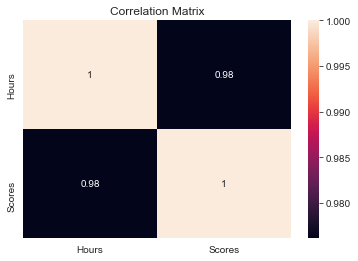

In [12]:
sns.heatmap(df.corr(), annot=True)
plt.title('Correlation Matrix');

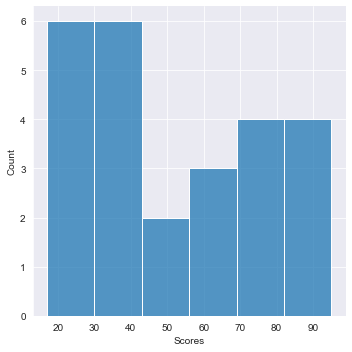

In [13]:
sns.displot(df.Scores)

/Users/askarisayed/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


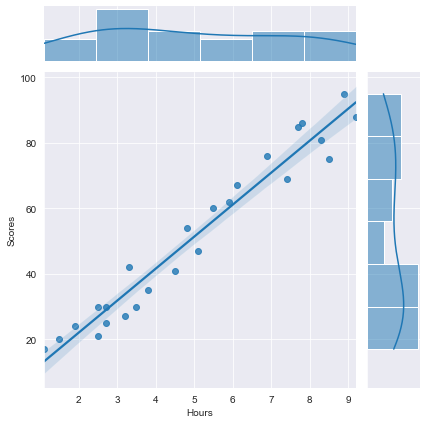

In [14]:
sns.jointplot('Hours','Scores',data=df,kind='reg');

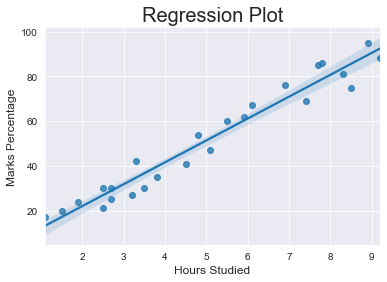

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


In [15]:
sns.regplot(x=df['Hours'],y=df['Scores'])
plt.title('Regression Plot',size=20)
plt.ylabel('Marks Percentage',size=12)
plt.xlabel('Hours Studied',size=12)
plt.show()
print(df.corr())

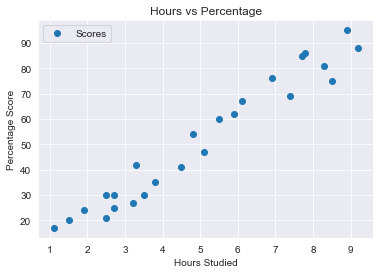

In [16]:
df.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

By Visualization 
> As the Study Hours Increases the chance os scoring high is also increasing.
>We Could also see that there is a strong positive co-relation the number of hours studied and percentage of score.

__Seprating X and Y__

In [17]:
X = df.iloc[:, :-1].values
y = df.iloc[:, 1].values

# Train Test Spliting #

In [18]:
from sklearn.model_selection import train_test_split
train_X,val_X,train_y,val_y = train_test_split(X, y, random_state=0)

In [19]:
train_X.shape

(18, 1)

In [20]:
train_y.shape

(18,)

In [21]:
val_X.shape

(7, 1)

In [22]:
val_y.shape

(7,)

___Model  Building___

In [23]:
# Modeling

from sklearn.linear_model import LinearRegression

regressor = LinearRegression()

regressor.fit(train_X, train_y)



LinearRegression()

In [24]:
pred_y = regressor.predict(val_X)
prediction = pd.DataFrame({'Hours':[i[0] for i in val_X], 'Predicted Marks':[k for k in pred_y]})
prediction

,Hours,Predicted Marks
0,1.5,16.844722
1,3.2,33.745575
2,7.4,75.500624
3,2.5,26.786400
4,5.9,60.588106
5,3.8,39.710582
6,1.9,20.821393


In [25]:
compare_scores = pd.DataFrame({'Actual Marks': val_y, 'Predicted Marks':pred_y})
compare_scores

,Actual Marks,Predicted Marks
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


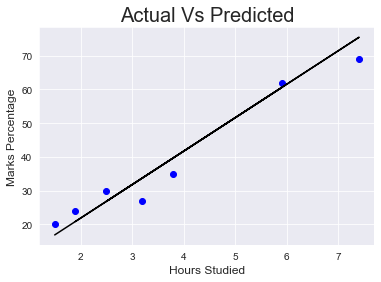

In [26]:
plt.scatter(x=val_X,y=val_y,color='blue')
plt.plot(val_X,pred_y,color='black')
plt.title('Actual Vs Predicted',size=20)
plt.ylabel('Marks Percentage',size=12)
plt.xlabel('Hours Studied',size=12)
plt.show()

__Model Evaluation__

In [27]:
from sklearn.metrics import mean_absolute_error,r2_score

In [28]:
print('Mean Absolute Error: ',mean_absolute_error(val_y,pred_y))

Mean Absolute Error:  4.130879918502486


In [29]:
print('R2 Score is :',r2_score(val_y,pred_y))

R2 Score is : 0.9367661043365055


__Prediciton Of Percentage Based on Hours he/she has studied__

In [30]:
hours = [9.25]
answer = regressor.predict([hours])
print("Score = {}".format(round(answer[0],3)))

Score = 93.893


In [31]:
hours = [8]
answer = regressor.predict([hours])
print("Score = {}".format(round(answer[0],3)))

Score = 81.466


In [32]:
hours = [7.20]
answer = regressor.predict([hours])
print("Score = {}".format(round(answer[0],3)))

Score = 73.512


In [33]:
hours = [5]
answer = regressor.predict([hours])
print("Score = {}".format(round(answer[0],3)))

Score = 51.641


> __According to given problem statement if student studies for 9.25 hours he/she will likely score 93.893% percentage__

> __According to given problem statement if student studies for 8 hours hours he/she will likely score 81.466% percentage__

> __According to given problem statement if student studies for 7.20 hours hours he/she will likely score 73.512% percentage__

> __According to given problem statement if student studies for 5  hours hours he/she will likely score 51.461% percentage__

